__Фоменко Андрей Алексеевич, БЭК 213__

In [224]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import copy 

### 1) Однажды в Самарканде турист заказывал Яндекс-такси. На десятом заказе впервые приехал таксист, который уже раньше приезжал к туристу. Для упрощения предположим, что все n таксистов Самарканда всегда на работе и приезжают равновероятно.

а) [5] Постройте график функции правдоподобия как функции от общего количества такси n. Найдите оценку числа n методом максимального правдоподобия.

б) [5] Постройте график математического ожидания номера заказа, на котором происходит первый повторный приезда, как функции от общего количества такси n. Найдите оценку числа n методом моментов.

в) [15] Предположим, что настоящее n равно 100. Проведя 10000 симуляций вызовов такси до первого повторного, рассчитайте 10000 оценок методом моментов и 10000 оценок методом максимального правдоподобия. Постройте гистограммы для оценок двух методов. Оцените смещение, дисперсию и среднеквадратичную ошибку двух методов.

## a) 

### X - с.в. номер шага, на котором мы встретили повторку 
P(X=2) = 1/n

P(X=3) = (n-1)/n * 2/n - так как неповторимые таксисты могут приехать в произвольном порядке домножим на бин. коэф.

P(X=4) = (n-1)/n * (n-2)/n * 3/n

Тогда: P(X=k) = (n-1)/n * (n-2)/n *...* (n-k+1)/n  * k/n 

Пусть: (n-1)/n*(n-2)/n*...*(n-k-1)/n = N



In [2]:
# Напишем функцию для поиска вероятности, где n - всего оригинальных водителей, а k - номер вызова на котором приехала повторка
def N(n, k):
    res =  (np.ones(k)*n - np.arange(1, k+1))/n
    return np.prod(res)

def P(n, k):
    if k == 2:
        return 1/n
    else:
        ans = N(n, k-2) * (k-1)/n
        return ans

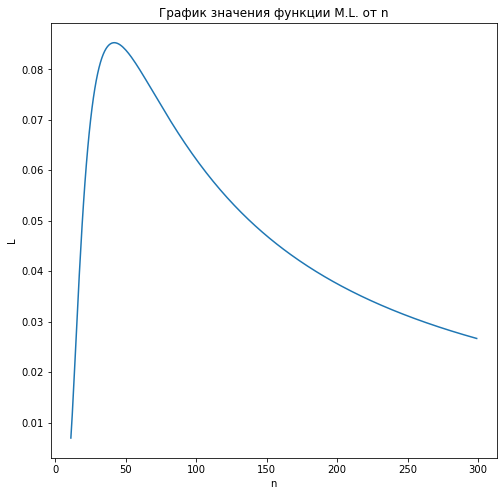

In [3]:
n_vec = np.arange(11, 300)
k = 10
n_obs =1
L_list = []
for n in n_vec:
    L_list.append(P(n, k)) # к у нас фиксировано, потому что одно наблюдение L(n, k) = P(n, k)
    
plt.figure(figsize = (8,8))
plt.plot(n_vec, L_list)
plt.title('График значения функции M.L. от n')
plt.xlabel('n')
plt.ylabel('L')
plt.show()

Чтоб найти оценку n надо максимизировать функцию L по n. Производную брать не хочется, тем более, по графику видно что максимум где-то возле 50, решим перебором


In [4]:
# максимизируем функцию, спускаясь по координам n
ans = []
for n in range(30, 80):
    L = P(n, 10)
    el = [n, L]
    ans.append(el)
ans = sorted(ans, key = lambda x : x[1],reverse=True)
ans[0]

[42, 0.0852593728562763]

##### Значит, ML оценка для n при к = 10 это 42

## б) 

In [5]:
# запишем матожидание как функцию от n
def E(n): 
    vec_k = np.arange(2, n+2) # пусть к меньше или равно n 
    P_v = np.vectorize(P)
    Vec_p = P_v(n, vec_k)
    return vec_k@Vec_p

Text(0, 0.5, 'E')

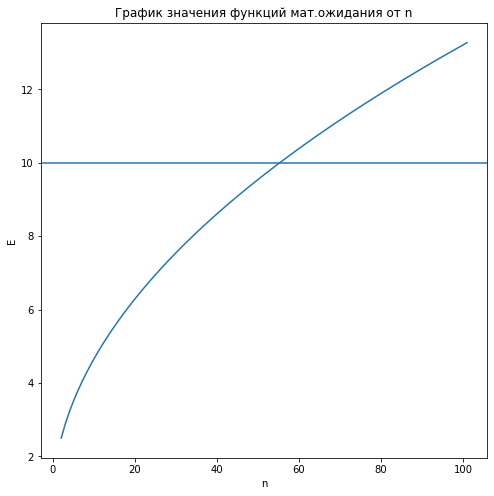

In [10]:
n_all = np.arange(2, 102)
E_list = []
otv = []
for n in n_all:
    E_list.append(E(n))
    f = [E(n), n]
    otv.append(f)
plt.figure(figsize = (8,8))
plt.plot(n_all, E_list);
plt.axhline(y= 10);
plt.title('График значения функций мат.ожидания от n')
plt.xlabel('n')
plt.ylabel('E')

##### Как видно ближе всего к 10 оказалась n = 55


## в)

In [11]:
# генерим наблюдения 
np.random.seed(3)
n = 100
taxis = np.arange(1, n+1)
otv = []
for i in range(1, 10001):
    one = np.random.choice(taxis)
    biv = []
    while np.isin(one, biv) == False:
        biv.append(one) 
        one = np.random.choice(taxis)
        
    k = len(biv)+1
    otv.append(k)


In [12]:
# напишем функцию которая будет максимизировать нашу функцию правдоподобия сдвигая координату n
def L_max(k): 
    n = k-1
    L_f1 = P(n, k)
    L_f2 = P(n, k)
    while L_f1 <= L_f2:
        L_f1 = P(n, k)
        n += 1
        L_f2 = P(n, k)
    return n-1

In [13]:
# применяем максимизатор к нашим сгенерированным данным
L_v = np.vectorize(L_max)
all_L = L_v(otv)

Text(0, 0.5, 'E')

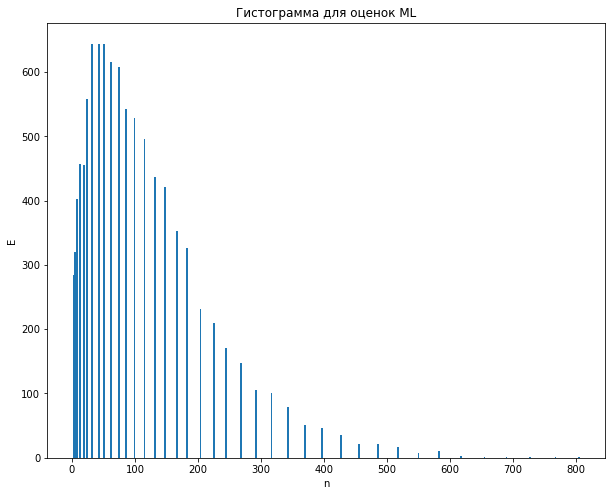

In [17]:
plt.figure(figsize = (10,8))
plt.hist(all_L, bins = 300);
plt.title('Гистограмма для оценок ML')
plt.xlabel('n')
plt.ylabel('E')

Text(0, 0.5, 'E')

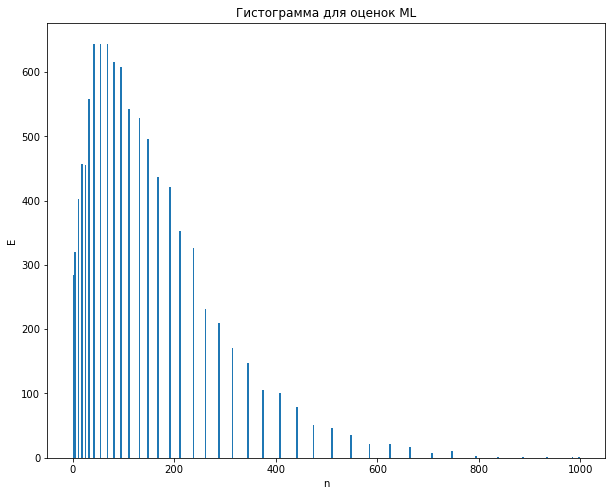

In [18]:
# делаем гистограмму для метода моментов
otv =np.array(otv)
nn = np.arange(1, 1001)
E_vect = np.vectorize(E)
E_res = E_vect(nn)
E_res2 = E_res[:, np.newaxis]
DN_res2 = otv[np.newaxis, :]
E_result = np.absolute(E_res2 - DN_res2)
all_M = np.argmin(E_result, axis = 0)

plt.figure(figsize = (10,8))
plt.hist(all_M, bins = 300);
plt.title('Гистограмма для оценок ML')
plt.xlabel('n')
plt.ylabel('E')

Найдем смещение, дисперсию и среднеквадратичную ошибку

In [15]:
s_L = abs(100 - np.mean(all_L))
s_M = abs(100 - np.mean(all_M))
var_L = np.var(all_L)
var_M = np.var(all_M)
sig_L = np.std(all_L)
sig_M = np.std(all_M)

In [16]:
result = pd.DataFrame({'Оценка': ('ML', 'MM'),'Смещение': (s_L, s_M), 'Дисперсия': (var_L, var_M), 'Среднеквадратичная_ошибка': (sig_L, sig_M)})
result.set_index('Оценка')

,Смещение,Дисперсия,Среднеквадратичная_ошибка
Оценка,,,
ML,4.6729,8556.735906,92.502626
MM,23.3565,14170.663208,119.040595


#### Вывод: как видно по табличке, ML оценка во всем оказалась лучше MM оценки, оно и не удивительно, ведь функция вероятности хорошая и отлично максимизируется

### 2) Однажды в Самарканде турист заказывал Яндекс-такси. На десятом заказе он обнаружил, что у таксистов было 6 разных имён. Для упрощения предположим, что все n имён среди таксистов встречаются равновероятно и независимо от поездки к поездке.


а) [5] Постройте график функции правдоподобия как функции от общего количества имён n. Найдите оценку числа n методом максимального правдоподобия.


б) [5] Постройте график математического ожидания числа разных имён у 10 таксистов, как функции от общего количества имён n. Найдите оценку числа n методом моментов.


в) [15] Предположим, что настоящее n равно 20. Проведя 10000 симуляций десяти вызовов такси, рассчитайте 10000 оценок методом моментов и 10000 оценок методом максимально- го правдоподобия. Постройте гистограммы для оценок двух методов. Оцените смещение, дисперсию и среднеквадратичную ошибку двух методов.


Update 2023-06-07: если по выборке в симуляциях оценка метода моментов или метода максимального правдоподобия стремится к бесконечности, то можно ограничить её свер- ху большим числом, например, 100.

## a)

##### Пусть X - кол-во уникальных имен в выборке из 10 приеховших таксистов,  n - кол-во всех имен, а N - кол-во вызовов. Предположим, что n>1 и X = {1, 2...N},

Тогда функцию вероятности можно представить как: 


$ P(X = k) = (n-1)/n * (n-2)/n *...*(n-k+1)/n * T $

где Т - сумма произведений всех комбинаций по N-k чисел от 1 до к


In [38]:
# Напишем функцию для вероятности 
from itertools import combinations_with_replacement as cwm
def T(k, n, N): # функция для произведений перестановок 
    comb = cwm(np.arange(1, k+1), N - k)
    cnt = 0
    for i in comb:
        mult = 1
        for j in range(N - k):
            mult *= i[j]
        cnt += mult
    return cnt

def P_2(k, n, N):
    p=1
    for i in range(1, k):
        p*= ((n-i)/n)
    p *= (T(k, n, N)/(n**(N - k)))
    return p

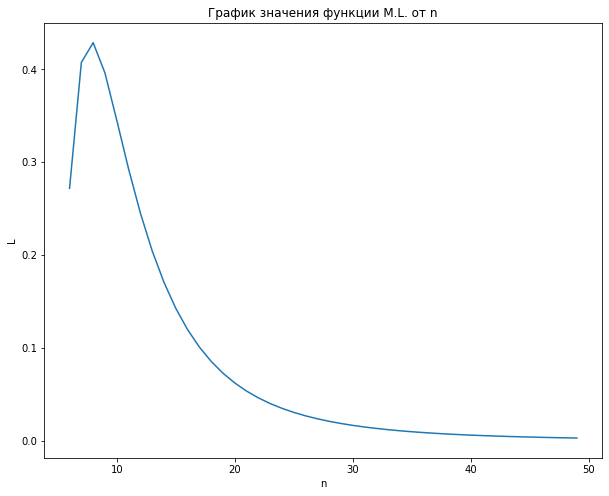

In [131]:
# Нарисуем график ML 
n_vec = np.arange(6, 50)
k = 6
L_list = []
for n in n_vec:
    L_list.append(P_2(k, n, 10)) # к у нас фиксировано, потому что одно наблюдение L(n, k) = P(n, k)
plt.figure(figsize = (10,8))
plt.plot(n_vec, L_list)
plt.title('График значения функции M.L. от n')
plt.xlabel('n')
plt.ylabel('L')
plt.show()

In [40]:
# максимизируем функцию правдоподобия
ans = []
for n in range(6, 50):
    L = P_2(k, n, 10)
    el = [n, L]
    ans.append(el)
ans = sorted(ans, key = lambda x : x[1],reverse=True)
ans[0]

[8, 0.42858749628067017]

Значит, ML оценка это 8

## б)

In [44]:
# функция для поиска матожидания
def E_2(n, N):
    vec_k = np.arange(1, N+1) 
    P_v = np.vectorize(P_2)
    Vec_p = P_v(vec_k, n, N)
    return vec_k@Vec_p

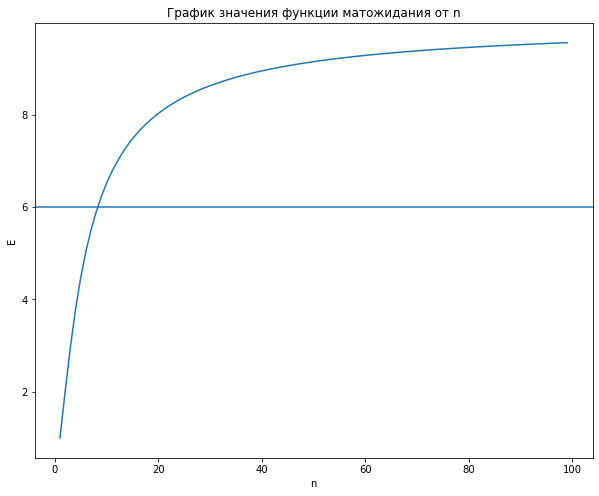

In [48]:
# рисуем график матожидания
n_all = np.arange(1, 100)
E_list = []
otv = []
for n in n_all:
    E_list.append(E_2(n, 10))
    f = [E_2(n, 10), n]
    otv.append(f)
    
plt.figure(figsize = (10,8))
plt.plot(n_all, E_list);

plt.title('График значения функции матожидания от n')
plt.xlabel('n')
plt.ylabel('E')
plt.axhline(y= 6);
plt.show()

In [251]:
n_all[abs(np.array(E_list) - 6) == min(abs(np.array(E_list) - 6))]

array([8])

Значит оценка методом моментов тоже 8

## в)

In [51]:
# проводим эксперименты
np.random.seed(3)
n = 20
names = np.arange(1, n+1)
otv = []
for i in range(1, 10001):
    one = np.random.choice(names)
    biv = []
    M = 10
    for i in range(M):
        biv.append(one) 
        one = np.random.choice(names)
    un = len(set(biv))
    otv.append(un)

In [52]:
# функция для поиска максимума, ставим границу в 100, так как при к=10 у нас нет экстремума
def L_max2(k): 
    n = 1
    L_f1 = P_2(k, n, 10)
    L_f2 = P_2(k, n, 10)
    while L_f1 <= L_f2 and n <100:
        L_f1 = P_2(k, n, 10)
        n += 1
        L_f2 = P_2(k, n, 10)
    return n-1

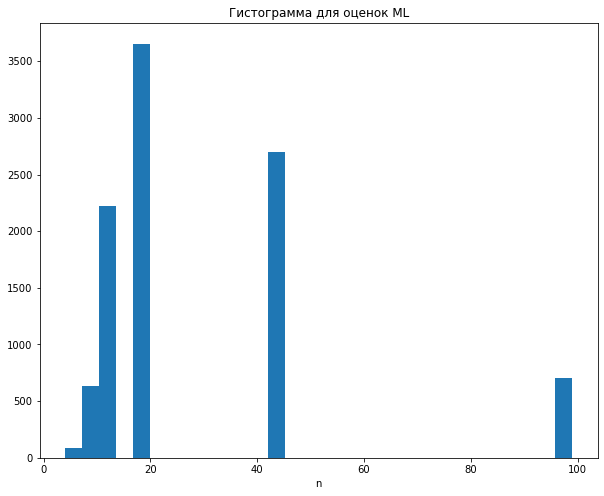

In [55]:
# строим гистограмму для ML оценки 
L_v = np.vectorize(L_max2)
all_L = L_v(otv)

plt.figure(figsize = (10,8))
plt.hist(all_L, bins = 30);
plt.title('Гистограмма для оценок ML')
plt.xlabel('n')
plt.show()

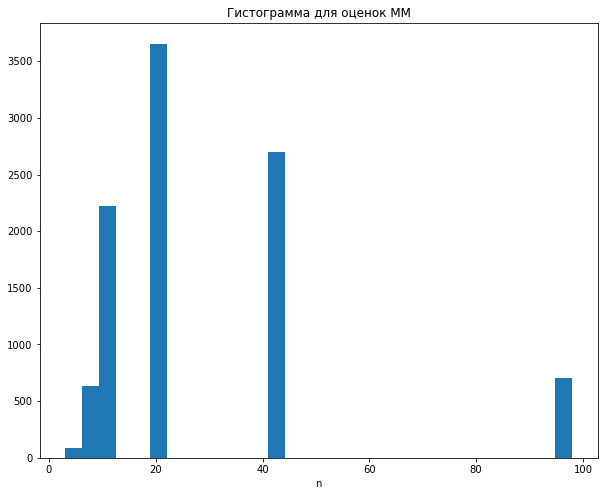

In [56]:
# делаем гистограмму для ММ оценки
otv =np.array(otv)
nn = np.arange(1, 100)
E_vect = np.vectorize(E_2)
E_res = E_vect(nn, 10)
E_res2 = E_res[:, np.newaxis]
DN_res2 = otv[np.newaxis, :]
E_result = np.absolute(E_res2 - DN_res2)
all_M = np.argmin(E_result, axis = 0)

plt.figure(figsize = (10,8))
plt.hist(all_M, bins = 30);
plt.title('Гистограмма для оценок MM')
plt.xlabel('n')
plt.show()

In [57]:
s_L = abs(20 - np.mean(all_L))
s_M = abs(20 - np.mean(all_M))
var_L = np.var(all_L)
var_M = np.var(all_M)
sig_L = np.std(all_L)
sig_M = np.std(all_M)

In [58]:
result = pd.DataFrame({'Оценка': ('ML', 'MM'),'Смещение': (s_L, s_M), 'Дисперсия': (var_L, var_M), 'Среднеквадратичная_ошибка': (sig_L, sig_M)})
result.set_index('Оценка')



,Смещение,Дисперсия,Среднеквадратичная_ошибка
Оценка,,,
ML,8.4312,522.102067,22.849553
MM,7.8048,515.062297,22.694984


#### Вывод: в этот раз ML оценка оказалась даже немного хуже MM оценки, возможно это из-за того что мы уперлись в нерегулярный случай, когда область определения нашей функции зависит от параметра 

### 3.Иноагент Иннокентий по 20 наблюдениям строит 95%-й доверительный интервал для математического ожидания несколькими способами: классический асимптотический нормальный интервал, с помощью наивного бутстрэпа, с помощью бутстрэпа t-статистики.

а) [15]Для каждого способа с помощью 10000 симуляций оцените вероятность того,что номинально 95%-й доверительный интервал фактически накрывает математическое ожидание, если наблюдения распределены экспоненциально с интенсивностью 1.


б) [5]Пересчитайте вероятности накрытия, если наблюдения имеют распределение Стьюдента с тремя степенями свободы.


в) [5] Какой способ оказался лучше?

## a)

In [59]:
# генерим выборку
np.random.seed(323)
exp_all = np.random.exponential(1, size=(10**4, 20))

In [60]:
# пишем ручками z-тест
import scipy.stats as sps
def z_test(obs, h0_mu, alpha, n):
    dist = sps.norm(loc=0, scale=1)
    mu = np.mean(obs)
    std = np.std(obs)/np.sqrt(n)
    q_r = dist.ppf(1 - alpha/2)
    q_l = dist.ppf(alpha/2)
    left_bord = mu + q_l*std
    right_bord = mu + q_r*std
    ci = np.logical_and(left_bord <= h0_mu, right_bord >= h0_mu)
    return ci

In [63]:
h0 =1
alpha = 0.05
n = 20
otv = np.apply_along_axis(z_test, 1, exp_all, h0, alpha, n)
z_test_exp_res = np.mean(otv)
z_test_exp_res

0.9005

Как видно, мы накрываем реальное матожидание примерно в 90% случаев

In [64]:
# напишем наивный бутстрэп, который будет возвращать принадлежность истинного значения к доверительному интервалу
def naive_boot(obs, h0_mu, alpha, n):
    pr = alpha*100
    indices = np.random.choice(np.arange(n), size=(10**4, n))
    means = np.mean(obs[indices], axis=1) 
    q_l = np.percentile(means, pr/2)
    q_r = np.percentile(means, 100- pr/2)
    ci = np.mean(np.logical_and(q_l <= h0_mu, q_r >= h0_mu))
    return ci

In [65]:
h0 =1
alpha = 0.05
n = 20
otv = np.apply_along_axis(naive_boot, 1, exp_all, h0, alpha, n)
naive_boot_exp_res = np.mean(otv)
naive_boot_exp_res

0.9035

Получается, что мы опять накрываем реальное значение примерно с вероятностью 0.9

In [160]:
# теперь напишем t-бутстрап
def t_stat_boot(obs, h0_mu, alpha, n):
    pr = alpha*100
    indices = np.random.choice(np.arange(n), size=(10**4, n))
    means = np.mean(obs[indices], axis=1)
    mean_obs = np.mean(obs)
    se = (np.std(obs[indices], axis=1, ddof = 1))/np.sqrt(n)
    t_stat = (means - mean_obs)/se
    q_l = np.percentile(t_stat, pr/2)
    q_r = np.percentile(t_stat, 100- pr/2)
    l_bord = mean_obs - q_r*(np.std(obs, ddof = 1))/np.sqrt(n)
    r_bord = mean_obs - q_l*(np.std(obs, ddof = 1))/np.sqrt(n)    
    ci = np.mean(np.logical_and(l_bord <= h0_mu, r_bord >= h0_mu))
    return ci

In [161]:
h0 =1
alpha = 0.05
n = 20
otv = np.apply_along_axis(t_stat_boot, 1, exp_all, h0, alpha, n)
t_boot_exp_res = np.mean(otv)
t_boot_exp_res

0.9462

В этот раз вероятность накрытия уже побольше, целых 0.946

## б)

In [68]:
# возьмем теперь выборку из t-распределения
np.random.seed(323)
t_all = np.random.standard_t(3, size=(10**4,20))

In [69]:
# применяем z-тест
h0 = 0 
alpha = 0.05
n = 20
otv = np.apply_along_axis(z_test, 1, t_all, h0, alpha, n)
z_test_t_res = np.mean(otv)
z_test_t_res

0.939

В этот раз z-тест справился лучше, выдал 0.939 вероятность накрытия

In [70]:
# применяем наивный бут
h0 = 0
alpha = 0.05
n = 20
otv = np.apply_along_axis(naive_boot, 1, t_all, h0, alpha, n)
naive_boot_t_res = np.mean(otv)
naive_boot_t_res

0.9224

Что-то ему поплохело и он выдал всего 0.9224

In [71]:
# используем t-бутстрап
h0 = 0 
alpha = 0.05
n = 20
otv = np.apply_along_axis(t_stat_boot, 1, t_all, h0, alpha, n)
t_boot_t_res = np.mean(otv)
t_boot_t_res

0.9289

И он тоже справился хуже z-теста, показав всего 0.9289

## в)

In [72]:
# подготовим табличку с итоговыми результатами
result = pd.DataFrame({'Распределение': ('Exp(1)', 't(3)'),
                       'Z-test': (z_test_exp_res, z_test_t_res),
                       'naive_boot': (naive_boot_exp_res, naive_boot_t_res),
                       't-boot': (t_boot_exp_res, t_boot_t_res)})
result.set_index('Распределение')

,Z-test,naive_boot,t-boot
Распределение,,,
Exp(1),0.9005,0.9035,0.9458
t(3),0.9390,0.9224,0.9289


##### Вывод: как видно из таблички, Z-test обгоняет бутстрэпы для t-распределения, скорее всего это связано с тем, что оно гораздо лучше апроксимируется нормальным распределением при небольшом n, однако для Exp(1) распределения бутстрэп т-статистики оказался лучшим

### 4) Проверьте гипотезу о том, что ожидаемые результаты экзамена по теории вероятностей тех, у кого фамилия начинается с гласной буквы и с согласной буквы, равны. В качестве альтернатив- ной гипотезы возьмите гипотезу о неравенстве.


а) [5] Используйте тест Уэлча.


б) [5] Используйте наивный бутстрэп.


в) [5] Используйте бутстрэп t-статистики.

г) [5] Используйте перестановочный тест.


## a)

In [73]:
# Читаем данные 
df = pd.read_excel('exam.xlsx')

In [74]:
# Проверяем пропуски
df.isnull().sum().sum()

0

In [75]:
df

,last name,score
0,Бабурина,10
1,Багаутдинов,16
2,Бартенева,27
3,Батмунх,16
4,Бгажноков,22
...,...,...
327,Ян,15
328,Янковская,8
329,Янышен,13
330,Яхьяева,13


In [76]:
# Проводим разбиение выборки по буквам
import re
glas, sogl = r'^[АЕЁИОУЫЭЮЯ]', r'^[БВГДЖЗЙКЛМНПРСТФХЦЧШЩ]'
df_g, df_s = df[df['last name'].str.contains(glas, flags = re.ASCII)], df[df['last name'].str.contains(sogl, flags = re.ASCII)]


In [77]:
# Используем готовый тест из сайпая
from scipy.stats import ttest_ind
welch = ttest_ind(df_g['score'], df_s['score'], equal_var=False, alternative='two-sided')
welch

Ttest_indResult(statistic=-0.8519661870595602, pvalue=0.3974027153843839)

In [78]:
# Пишем тест Уэлча ручками
from scipy.stats import t
def welch_test(obs_x, obs_y, alpha):
    mean_diff_obs = np.mean(obs_x)- np.mean(obs_y)
    x_mean, y_mean = np.mean(obs_x), np.mean(obs_y)
    n_x, n_y = len(obs_x), len(obs_y)
    se_x, se_y = np.var(obs_x)/n_x, np.var(obs_y)/n_y
    t_obs =  (x_mean - y_mean)/np.sqrt(se_x + se_y)
    
    d = (se_x + se_y)**2 /( (np.var(obs_x)**2 / (n_x**2*(n_x-1))) + (np.var(obs_y)**2/(n_y**2*(n_y-1))) )
    
    l_bord = x_mean - y_mean+t.ppf(alpha/2, d, loc=0, scale=1)*np.sqrt(se_x + se_y)
    u_bord = x_mean - y_mean+t.ppf(1-alpha/2, d, loc=0, scale=1)*np.sqrt(se_x + se_y)
    
    ci = np.logical_and(l_bord <= 0, u_bord >= 0)
    
    p_value = 2* (min(t.cdf(t_obs, d), 1 - t.cdf(t_obs, d)))

    return ci, p_value 

In [79]:
welch = welch_test(df_g['score'], df_s['score'], 0.05)
welch

(True, 0.39309642135827627)

Судя и по пакетному тесту, и по рукописному тесту, гипотеза не отвергается для alpha = 0.05. Тест выдал p-value 0.3974027153843839, что очень много 

## б)

In [214]:
# пишем новый наивный бутстрап
np.random.seed(321)
def naive_boot_2(obs_x, obs_y, alpha):
    mean_diff_obs = np.mean(obs_x) - np.mean(obs_y)
    pr = alpha*100
    n_x, n_y = len(obs_x), len(obs_y)
    indices_x,  indices_y = np.random.choice(np.arange(n_x), size=(10**4, n_x)), np.random.choice(np.arange(n_y), size=(10**4, n_y))
    means_x, means_y = np.mean(obs_x[indices_x], axis=1), np.mean(obs_y[indices_y], axis=1)

    ras = means_x - means_y - mean_diff_obs 
    q_l, q_r = np.percentile(ras, pr/2), np.percentile(ras, 100- pr/2)
    ci = np.mean(np.logical_and(q_l <= 0, q_r >= 0))
    p_value = 2*(np.min([np.mean((mean_diff_obs < ras)), 1- np.mean(mean_diff_obs <= ras)]))
    return ci, p_value


In [215]:
naive_boot_2(np.array(df_g['score']), np.array(df_s['score']), 0.05)

(1.0, 0.3832)

Как видно, все хорошо, и гипотеза не отвергается, а p-value 0.3832 получается 

## в)

In [222]:
# пишем бутстрап t-статичтики, который вернет нам индикатор принадлежности к доверительному интервалу и p-value
np.random.seed(326)
def t_stat_boot_2(obs_x, obs_y, alpha):
    pr = alpha*100
    
    mean_obs = obs_x.mean() - obs_y.mean()
    se_obs = np.sqrt((obs_x.var(ddof=1)/len(obs_x)) + (obs_y.var(ddof=1)/len(obs_y)))
    stat_obs = (mean_obs - 0)/se_obs

    n_x, n_y = len(obs_x), len(obs_y)
    
    indices_x,  indices_y = np.random.choice(np.arange(n_x), size=(10**4, n_x)), np.random.choice(np.arange(n_y), size=(10**4, n_y))
    means_x, means_y = np.mean(obs_x[indices_x], axis=1), np.mean(obs_y[indices_y], axis=1)
    mboot_mean = means_x - means_y- mean_obs  
    se_boot = np.sqrt((np.var(means_x, ddof=1)) /(n_x) + np.var(means_y, ddof=1)/(n_y))    
    boots_all = (mboot_mean - mean_obs) / se_boot

    q_l, q_r = np.percentile(boots_all, pr/2), np.percentile(boots_all, 100- pr/2)
    l_bord, r_bord= mean_obs - q_r*se_obs, mean_obs - q_l*se_obs   
    
    ci = np.mean(np.logical_and(l_bord <= 0, r_bord >= 0))  
    p_value = 2* min((1 - (boots_all < stat_obs)).sum()/len(boots_all), (boots_all < stat_obs).sum()/len(boots_all))
    return ci, p_value


In [223]:
t_stat_boot_2(np.array(df_g['score']), np.array(df_s['score']), 0.05)

(1.0, 0.338)

Гипотеза не отвергается и все хорошо

## г)

In [112]:
# воспользуемся готовой реализацией перестановочного теста 
from mlxtend.evaluate import permutation_test
p_value = permutation_test(df_g['score'], df_s['score'],
                           method='approximate',
                           num_rounds=10000,
                           seed=322)
print(p_value)

0.37606239376062395


Опять же, гипотеза не отвергается

##### Вывод: все тесты показали, что нулевая гипотеза об одинаковой успеваимости двух групп учеников не отвергается

### 5. Составьте таблицу сопряжённости, поделив студентов писавших экзамен на четыре группы по двум признакам: набрал ли больше медианы или нет, на согласную или гласную букву начинается фамилия.
а) [5]Постройте 95% асимптотический интервал для отношения шансов хорошо написать экзамен («несогласных» к «согласным»). Проверьте гипотезу о том, что отношение шансов равно 1 и укажите P-значение.


б) [5] Постройте 95% асимптотический интервал для отношения вероятностей хорошо напи- сать экзамен. Проверьте гипотезу о том, что отношение вероятностей равно 1 и укажите P-значение.


в) [5] Постройте 95% интервал для отношения шансов хорошо написать экзамен с помощью наивного бутстрэпа. Проверьте гипотезу о том, что отношение шансов равно 1 и укажите P-значение.

## a)

In [113]:
# разделяем все на группы
med = np.median(df['score'])
sogl_and_med, sogl_and_nemed = df_s.iloc[np.where(df_s['score'] >= med)], df_s.iloc[np.where(df_s['score'] < med)]
glas_and_med, glas_and_nemed = df_g.iloc[np.where(df_g['score'] >= med)], df_g.iloc[np.where(df_g['score'] < med)]

In [114]:
# делаем таблицу сопряженности
table = pd.DataFrame({'Медиана': ('>=17.5', '<=17.5', 'Сумма по г/c'),
                       'Гласные': (len(glas_and_med), len(glas_and_nemed), len(df_g)),
                       'Согласные': (len(sogl_and_med), len(sogl_and_nemed), len(df_s)),
                       'Сумма по med': (len(glas_and_med)+len(sogl_and_med), len(glas_and_nemed)+len(sogl_and_nemed), len(glas_and_med)+len(sogl_and_med)+len(glas_and_nemed)+len(sogl_and_nemed))})
table = table.set_index('Медиана')
table

,Гласные,Согласные,Сумма по med
Медиана,,,
>=17.5,21,145,166
<=17.5,28,138,166
Сумма по г/c,49,283,332


In [116]:
# строим асимптотический доверительный интервал для шансов
ds = sts.norm(loc = 0, scale = 1)
alpha = 0.05
odds_ras = np.log(table['Гласные'][0]/table['Гласные'][1]) - np.log(table['Согласные'][0]/table['Согласные'][1]) 
se = np.sqrt(1/table['Согласные'][0]+1/table['Согласные'][1]+1/table['Гласные'][0]+1/table['Гласные'][1])
obs= (odds_ras)/se
dist = sps.norm(loc=0, scale=1)
ci = np.exp([odds_ras - dist.ppf(1-alpha/2)*se, odds_ras +  dist.ppf(1-alpha/2)*se])
p_value =  2*min([ds.cdf(obs), 1-ds.cdf(obs)])

In [117]:
print(p_value, ci)

0.280180274566451 [0.3870946  1.31621728]


Мы получили доверительный интервал: [0.3870946, 1.31621728], и p_value: 0.280180274566451, а значит, H0 не отвергается

## б)

In [122]:
# делаем то же самое но теперь для вероятности 
ver_ras = np.log(table['Гласные'][0]/table['Гласные'][2]) - np.log(table['Согласные'][0]/table['Согласные'][2]) 
ver_se = np.sqrt(1/table['Согласные'][0]-1/table['Согласные'][2]+1/table['Гласные'][0]-1/table['Гласные'][2])
obs= (ver_ras)/ver_se
dist = sps.norm(loc=0, scale=1)
ci = np.exp([ver_ras - dist.ppf(1-alpha/2)*ver_se, ver_ras +  dist.ppf(1-alpha/2)*ver_se])
p_value =  2*min([ds.cdf(obs), 1-ds.cdf(obs)])

In [123]:
print(p_value, ci)

0.3070947928050546 [0.59375296 1.1783587 ]


В этот раз p-value =0.3070947928050546, а доверительный интервал: [0.59375296, 1.1783587 ], но H0 по прежнему не отвергается

## в)

In [125]:
# а теперь напишем наивный бутстрап для шансов, а то как-то маловато бутстрапов 
def boot_ci(df_g, df_s, table, n, alpha):
    all_obs, odds, alpha = np.concatenate([df_g['score'], df_s['score']]), [], 100*alpha
    median = np.median(all_obs)
    med, nemed = table['Гласные'][0]/table['Гласные'][2], table['Согласные'][0]/table['Согласные'][2]
    obs_odd = ((nemed)/(1-nemed))/((med)/(1-med))
    for i in range(n):
        rand_per_g, rand_per_s = np.random.choice(df_g['score'], size=len(df_g['score'])), np.random.choice(df_s['score'], size=len(df_s['score']))  
        glas_med, glas_nemed = sum(rand_per_g >= median), sum(rand_per_g < median)
        sog_med, sog_nemed = sum(rand_per_s >= median), sum(rand_per_s < median)
        new_vec = np.array([[glas_med, glas_nemed], [sog_med, sog_nemed]])
        new_med, new_nemed = new_vec[0][0]/(new_vec[0][0] + new_vec[0][1]), new_vec[1][0]/(new_vec[1][0] + new_vec[1][1])
        res = (new_nemed/(1-new_nemed))/(new_med/(1-new_med))
        odds.append(res)
    ql, qr = np.percentile(odds, alpha/2), np.percentile(odds, 100-alpha/2)
    p_value = 2*min(1 - sum((np.array(odds) < obs_odd))/len(odds), sum((np.array(odds) < obs_odd))/len(odds))
    ci = [ql, qr]
    return ci, p_value
        
        

In [126]:
boot_ci(df_g, df_s, table, 10**4, 0.05)

([0.7660714285714287, 2.664233576642336], 0.9862)

В этот раз доверительный интервал: [0.7645865043125318, 2.664320044918584], p-value = 0.9822, опять же нулевая гипотеза не отвергается

#### Вывод: опять все тесты показали, что отношение шансов и вероятностей примерно равно 1

### 6. Иноагент Иннокентий Вероятностно-Статистический считает, что длина фамилии положительно влияет на результат экзамена по теории вероятностей. А именно, он предполагает, что ожидаемый результат за экзамен прямо пропорционален длине фамилии, E(Yi) = βFi, где Yi — результат за экзамен по 30-балльной шкале, Fi — количество букв в фамилии.

а) [10] Оцените β методом моментов. Рассчитайте выборочную корреляцию.


б) [5] С помощью перестановочного теста найдите P -значение и формально протестируйте
гипотезу о том, что корреляция равна нулю.

## a)

In [127]:
# добавим в нашу табличку новый признак - длинна имени
df['len'] = df['last name'].apply(len)

In [128]:
# найдем оценку beta с помощью метода моментов, используя выборочное среднее и операцию деления
m1, m2 = df['score'].mean(), df['len'].mean()
beta = m1/m2
beta

2.0613026819923372

In [129]:
# считаем выборочну корреляцию
np.corrcoef(df['score'], df['len'])[0,1]

0.0253280526691477

У нас получилось: beta = 2.06, корреляция = 0.025, что почти ноль 

In [46]:
# функция для последнего перестановочного теста
def permut_test(df, n, alpha):
    alpha = alpha*100
    corrs = []
    for i in range(n):
        perm = np.random.choice(df['score'], size=len(df['score']), replace=False)
        corr_perm = np.corrcoef(perm, df['len'])[0][1]
        corrs.append(corr_perm)
    q_l, q_r = np.percentile(corrs, alpha/2), np.percentile(corrs, 100 - alpha/2)
    p_value = min(1 - (np.array(corrs) < 0).sum()/len(corrs), (np.array(corrs) < 0).sum()/len(corrs)) * 2
    return p_value

In [48]:
permut_test(df, 10**4, 0.05)

0.9916

Как видно, p_value = 0.9916, а значит, H0 не будет отвергаться, выборочная корреляция действительно около нулевая

### 7. [10]Спомощью chatgpt решите любую задачу из нашего курса теории вероятностей и статистики. Можно брать задачи из прошлых контрольных, лекций, семинаров и даже этого домашнего задания. В качестве ответа приведите полный диалог с chatgpt.


##### Попросил чат решить задачку 1.9 из наших листочков: 

Саша и Маша подкидывают монетку до тех пор, пока не выпадет последовательность РОО или ОOР. Если игра закончится выпадением РОО, то выигрывает Саша, если ОOР, то — Маша. Случайная величина X — общее количество подбрасываний, Y — количество выпавших решек.


У кого какие шансы выиграть?

https://chat.openai.com/share/41b6596c-576b-4d75-85a1-3a002d39de21

Это было не легко, но мне удалось довести этот венец развития технологий до правильного ответа

### 8. [5] Укажите любой источник по теории вероятностей или статистике, который вам оказался полезен в течение года. Это может быть статья, видео, задача, всё что угодно. Объясните, с чем конкретно этот источник помог разобраться. Лучше привести в пример внешний источник, не упомянутый на вики курса, но можно и внутренний.

Мне очень понравился курс ФПМИ по Основам вероятностей и теории меры, из-за большего уклона в теорию меры, помогало разобраться в некоторых теоретических аспектах https://www.youtube.com/watch?v=wDQ1IR2pf2I&list=PL4_hYwCyhAva7M5xo-yjQF-gzrvBnDamF


Так же очень понравилась книга Кельберт, Сухов: Вероятность и статистика в примерах и задачах. Том I. Основные понятия теории вероятностей, там есть много интересных задачь с развернутым ответом, а так же спрака по теории 